In [36]:
from google.colab import drive
drive.mount('/content/gdrive/') 
%cd "/content/gdrive/MyDrive/Colab Notebooks/ML_project"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/ML_project


In [37]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt

# Convert the json data into DataFrame

In [38]:
# import json

# # Get the data from json file
# with open('./train.json') as file:
#     data = json.load(file)

# # Print the data text and target
# count = 0
# for i in data:
#     print(data[i], ': ', i, '\n')

#     # Stop loop by undo comment
#     count += 1
#     if count == 5:
#         break

# # Convert the json file into DataFrame
# df = pd.DataFrame(columns=['News', 'Target'])

# for index in data:
#     df.loc[index] = [index, data[index]]
#     # df.append({"News": index, "Target": data[index]}, ignore_index=True)
# df.reset_index(drop=True, inplace=True)
# df.head()

# Read the train.csv file

In [39]:
df = pd.read_csv('train.csv', index_col=0)
print('Length of the original dataset ', len(df))
df.head(10)

Length of the original dataset  81222


,NewID,Category,Title,Abstract
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
3,N86255,health,Dispose of unwanted prescription drugs during ...,NaN
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...
5,N75236,health,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi..."
6,N99744,health,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re..."
7,N5771,health,Check Houston traffic map for current road con...,NaN
8,N124534,sports,Should NFL be able to fine players for critici...,Several fines came down against NFL players fo...
9,N51947,news,"How to record your screen on Windows, macOS, i...",The easiest way to record what's happening on ...


In [40]:
# Combine the features Title and Abstract into one & Drop the unuseful data feature columns
df['News'] = df['Title'].str.cat(df['Abstract'],sep=" ")
# dataset = df.drop(['NewID', 'Title', 'Abstract'],axis='columns')

# Drop all rows that contain NaN under those columns
df.dropna(subset = ["News"], inplace=True)
print('Length of the dropping NaN dataset ', len(df))

df.head(10)

Length of the dropping NaN dataset  77100


,NewID,Category,Title,Abstract,News
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","The Brands Queen Elizabeth, Prince Charles, an..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,Walmart Slashes Prices on Last-Generation iPad...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,50 Worst Habits For Belly Fat These seemingly ...
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,The Cost of Trump's Aid Freeze in the Trenches...
5,N75236,health,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",I Was An NBA Wife. Here's How It Affected My M...
6,N99744,health,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...","How to Get Rid of Skin Tags, According to a De..."
8,N124534,sports,Should NFL be able to fine players for critici...,Several fines came down against NFL players fo...,Should NFL be able to fine players for critici...
9,N51947,news,"How to record your screen on Windows, macOS, i...",The easiest way to record what's happening on ...,"How to record your screen on Windows, macOS, i..."
10,N59220,weather,It's been Orlando's hottest October ever so fa...,There won't be a chill down to your bones this...,It's been Orlando's hottest October ever so fa...
11,N17957,health,This Guy Altered His Diet and Training to Drop...,"Take Brandon Reid's advice: ""Don't worry what ...",This Guy Altered His Diet and Training to Drop...


# Get each unique features and plot their distribution

In [41]:
# Get the unique Catergory classes in the dataset
classes = df.Category.unique()
print('Number of Catergories ', len(classes), ' which contains')
classes

Number of Catergories  17  which contains


array(['lifestyle', 'news', 'health', 'sports', 'weather',
       'entertainment', 'foodanddrink', 'autos', 'travel', 'video', 'tv',
       'finance', 'movies', 'music', 'kids', 'middleeast', 'games'],
      dtype=object)

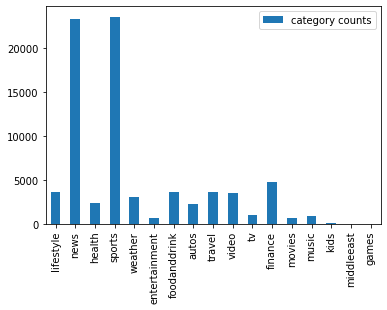

In [42]:
counts = []

for i in classes:
  count = len(df[df['Category']==i])
  counts.append(count)

categories = ['lifestyle', 'news', 'health', 'sports', 'weather',
       'entertainment', 'foodanddrink', 'autos', 'travel', 'video', 'tv',
       'finance', 'movies', 'music', 'kids', 'middleeast', 'games']

# Create a sample dataframe with an text index and plot bar chart
plotdata = pd.DataFrame({"category counts": counts}, index=categories)
plotdata.plot(kind="bar")

# Vectorizing and modelling only the feature Title text data

In [43]:
x_title_train, x_title_test, y_title_train, y_title_test = train_test_split(df.Title.values, df.Category.values, test_size=0.20, random_state=32)
print('Length of title train data', len(x_title_train), '\n')
print('Length of title test data', len(x_title_test), '\n')

title_vectorize = CountVectorizer()
X_title_train = title_vectorize.fit_transform(x_title_train)
X_title_test = title_vectorize.transform(x_title_test)
print('The first new \n\n', x_title_train[0], '\n', X_title_train[0])

model_title = LogisticRegression(max_iter=1000)
model_title.fit(X_title_train, y_title_train)

# Save the model to disk
import pickle
filename_title = 'lg_title_model.sav'
pickle.dump(model_title, open(filename_title, 'wb'))

Length of title train data 61680 

Length of title test data 15420 

The first new 

 5 charged in alcohol poisoning death of UC Irvine fraternity brother 
   (0, 5905)	1
  (0, 15214)	1
  (0, 1649)	1
  (0, 23076)	1
  (0, 8276)	1
  (0, 21208)	1
  (0, 31385)	1
  (0, 15800)	1
  (0, 12258)	1
  (0, 4750)	1


# Accuracy test on feature Title only

---



In [44]:
loaded_model_title = pickle.load(open(filename_title, 'rb'))
title_score = loaded_model_title.score(X_title_test, y_title_test)
print('Accuracy on title only is: ', title_score)

Accuracy on title only is:  0.7206874189364462


# Vectorizing and modelling the features Title and Abstract which is the column News in the DataFrame text data

In [29]:
# Vectorizing the text values using CountVectorizer
x_news = df.News.values
y_news = df.Category.values
x_news_train, x_news_test, y_news_train, y_news_test = train_test_split(x_news, y_news, test_size=0.20, random_state=32)

# y_train=y_train.astype('int')
print('Length of train data', len(x_news_train), '\n')
print('Length of test data', len(x_news_test), '\n')

news_vectorize = CountVectorizer()
# vectorize.fit(x_train)
X_news_train = news_vectorize.fit_transform(x_news_train)
X_news_test = news_vectorize.transform(x_news_test)
print('The first new \n\n', x_news_train[0], '\n', X_news_train[0])

# Train the model using LogisticRegression algorithm
model_news = LogisticRegression(max_iter=1000)
model_news.fit(X_news_train, y_news_train)

# Save the model to disk
import pickle
filename_news = 'lg_news_model.sav'
pickle.dump(model_news, open(filename_news, 'wb'))

Length of train data 61680 

Length of test data 15420 

The first new 

 5 charged in alcohol poisoning death of UC Irvine fraternity brother Five young men have been charged in connection with the death of their fraternity brother, who succumbed to alcohol poisoning after a booze-soaked party this year. 
   (0, 11259)	2
  (0, 27686)	2
  (0, 3543)	2
  (0, 42312)	2
  (0, 15417)	2
  (0, 39006)	2
  (0, 56732)	1
  (0, 28740)	1
  (0, 22295)	2
  (0, 9150)	2
  (0, 21446)	1
  (0, 60958)	1
  (0, 35322)	1
  (0, 25548)	1
  (0, 6791)	1
  (0, 13298)	1
  (0, 60091)	1
  (0, 54787)	1
  (0, 54809)	1
  (0, 59724)	1
  (0, 53048)	1
  (0, 55342)	1
  (0, 3197)	1
  (0, 8324)	1
  (0, 50903)	1
  (0, 40639)	1
  (0, 54920)	1
  (0, 60815)	1


# Accuracy test on feature Title and Abstract - News

In [45]:
# Using the saved model to get the accuracy on test data
loaded_model_news = pickle.load(open(filename_news, 'rb'))
news_score = loaded_model_news.score(X_news_test, y_news_test)
print('Accuracy on title and abstract is: ', news_score)

Accuracy on title and abstract is:  0.7431258106355383


# [Testing accuracy of the model using test.csv file]

In [56]:
test_df = pd.read_csv('./test.csv', index_col=0)
test_df['News'] = test_df['Title'].str.cat(test_df['Abstract'],sep=" ")

test_df.dropna(subset = ["News"], inplace=True)

In [60]:
# Get the unique Catergory classes in the test.csv dataset
classes_test = test_df.Category.unique()
print('Number of Catergories ', len(classes_test), ' which contains')
classes_test

Number of Catergories  16  which contains


array(['sports', 'news', 'finance', 'autos', 'lifestyle', 'travel',
       'weather', 'health', 'video', 'foodanddrink', 'movies', 'tv',
       'music', 'entertainment', 'kids', 'northamerica'], dtype=object)

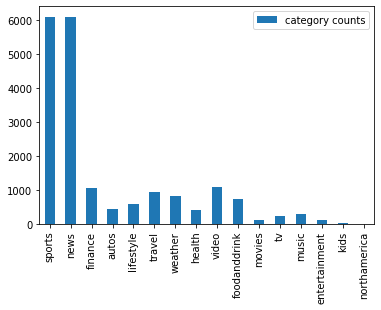

In [61]:
counts_test = []

for i in classes_test:
  count = len(test_df[test_df['Category']==i])
  counts_test.append(count)

categories_test = ['sports', 'news', 'finance', 'autos', 'lifestyle', 'travel',
       'weather', 'health', 'video', 'foodanddrink', 'movies', 'tv',
       'music', 'entertainment', 'kids', 'northamerica']

# Create a sample dataframe with an text index and plot bar chart
plotdata_test = pd.DataFrame({"category counts": counts_test}, index=categories_test)
plotdata_test.plot(kind="bar")

In [62]:
# Testing the accuracy of only Title feature on test.csv file
feature_test_title, label_test_title = test_df.Title.values, test_df.Category.values
Feature_test_title = title_vectorize.transform(feature_test_title)
accuracy_title = loaded_model_title.score(Feature_test_title, label_test_title)
print("Test.csv's on feature Title accuracy: ", accuracy_title)

# Testing the accuracy of Title and Abstract - News feature on test.csv file
feature_test_news, label_test_news = test_df.News.values, test_df.Category.values
Feature_test_news = news_vectorize.transform(feature_test_news)
accuracy_news = loaded_model_news.score(Feature_test_news, label_test_news)
print("Test.csv's on feature Title and Abstract - News accuracy: ", accuracy_news)

Test.csv's on feature Title accuracy:  0.7014517147065011
Test.csv's on feature Title and Abstract - News accuracy:  0.7305386071954555


# Predict the features label based on two models
  ## - model 1 testing only feature Title

In [63]:
#Model 1 on Title only (Test.csv): N5635,weather,Roads likely to turn slick as light snow falls across the Kansas City area,"Roads across the Kansas City area could become slick Monday as a wintry mix of rain, drizzle and light snow mixes with cold Canadian air, turning bridges and overpasses icy in spots. ""It's going to be a day we really have to keep a close eye on conditions outside,"" said FOX4 meteorologist Karli Ritter, who provides weather updates to The Star. ""The road conditions may not be so great ..."

string_title = title_vectorize.transform(["Roads likely to turn slick as light snow falls across the Kansas City area"])
loaded_model_title.predict(string_title)


array(['weather'], dtype=object)

  ## - model 2 testing features Title and Abstract

In [64]:
#Model 2 on Title and Abstract: N42356,sports,Gerrit Cole and Stephen Strasburg will cash in on their postseason dominance,They have all the leverage after dominant Octobers.

string_news = news_vectorize.transform(["Gerrit Cole and Stephen Strasburg will cash in on their postseason dominance They have all the leverage after dominant Octobers."])
loaded_model_news.predict(string_news)

array(['sports'], dtype=object)